Dataset Preview:
    Year  Python  Java  JavaScript  C++
0  2004     2.5    23        10.0   15
1  2005     3.0    22        11.0   15
2  2006     3.2    21        12.0   14
3  2007     3.5    20        13.0   14
4  2008     4.0    19        13.0   13


23:06:54 - cmdstanpy - INFO - Chain [1] start processing
23:06:58 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



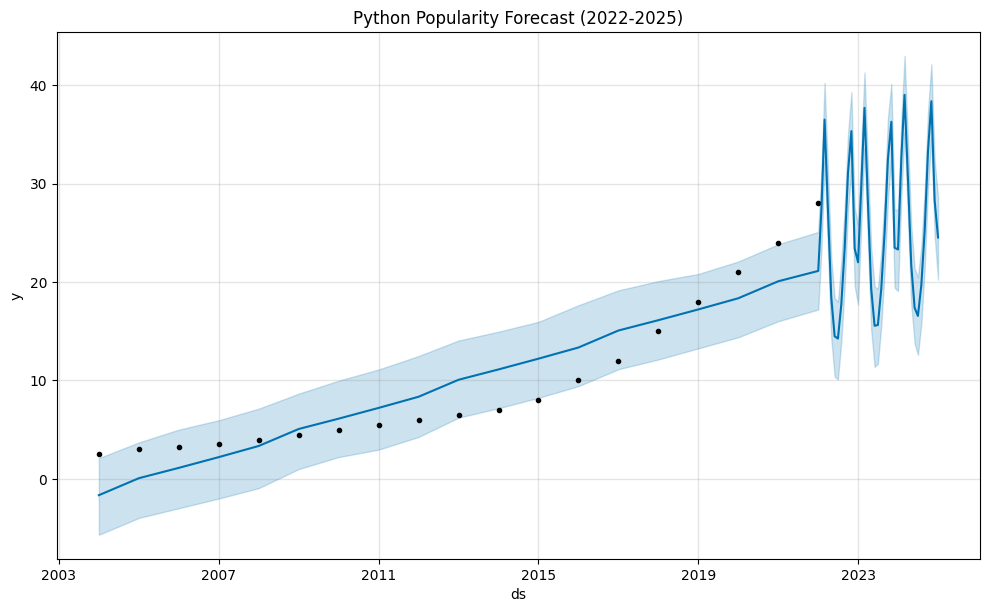

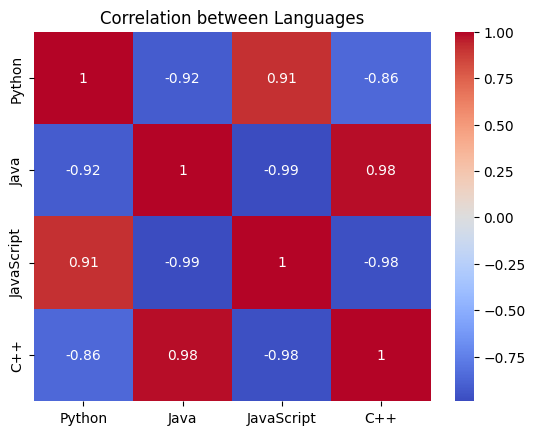

In [1]:
# Install libraries if needed
# !pip install pandas numpy matplotlib seaborn plotly prophet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet

# Load data
data = pd.read_csv('language_trends.csv')
print("Dataset Preview:\n", data.head())

# Plot trends
fig = px.line(data, x='Year', y=['Python', 'Java', 'JavaScript', 'C++'],
              title="Programming Language Popularity (2004-2022)")
fig.show()

# Prepare data for forecasting
df_python = data[['Year', 'Python']].rename(columns={'Year': 'ds', 'Python': 'y'})
df_python['ds'] = pd.to_datetime(df_python['ds'], format='%Y')

# Prophet Model
model = Prophet()
model.fit(df_python)
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)

# Forecast plot
model.plot(forecast)
plt.title("Python Popularity Forecast (2022-2025)")
plt.show()

# Correlation Heatmap
sns.heatmap(data[['Python', 'Java', 'JavaScript', 'C++']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Languages")
plt.show()
